# LSVT Vocal Rehabiliation

## Author: Spriha Ghosh



![alt](https://miro.medium.com/max/1400/1*Urc28sbnORGOW5oyohQ06g.gif)

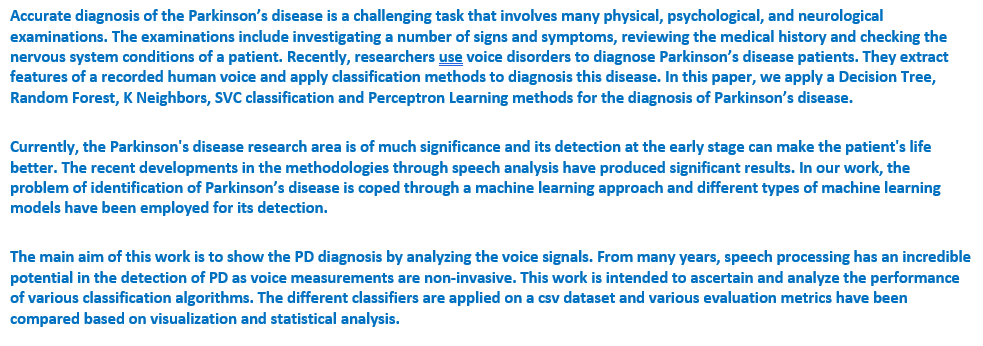



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinson-disease-detection/Parkinsson disease.csv


## Exploratory Data Analysis

In [2]:
df = pd.read_csv('../input/parkinson-disease-detection/Parkinsson disease.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
print(df.isna().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [6]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

We have 48 healthy patients and 147 parkinson disease affected patients

## Attribute Information

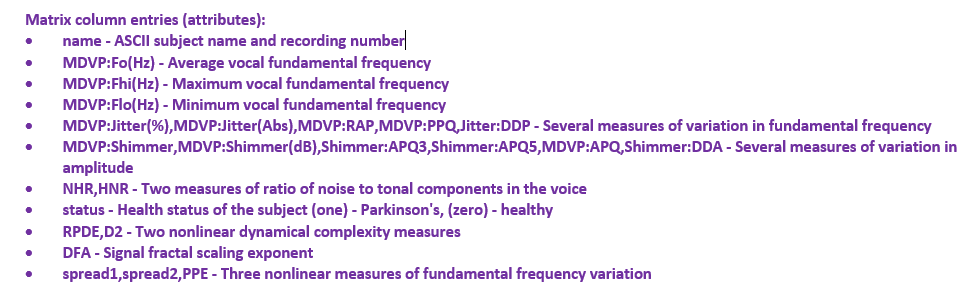

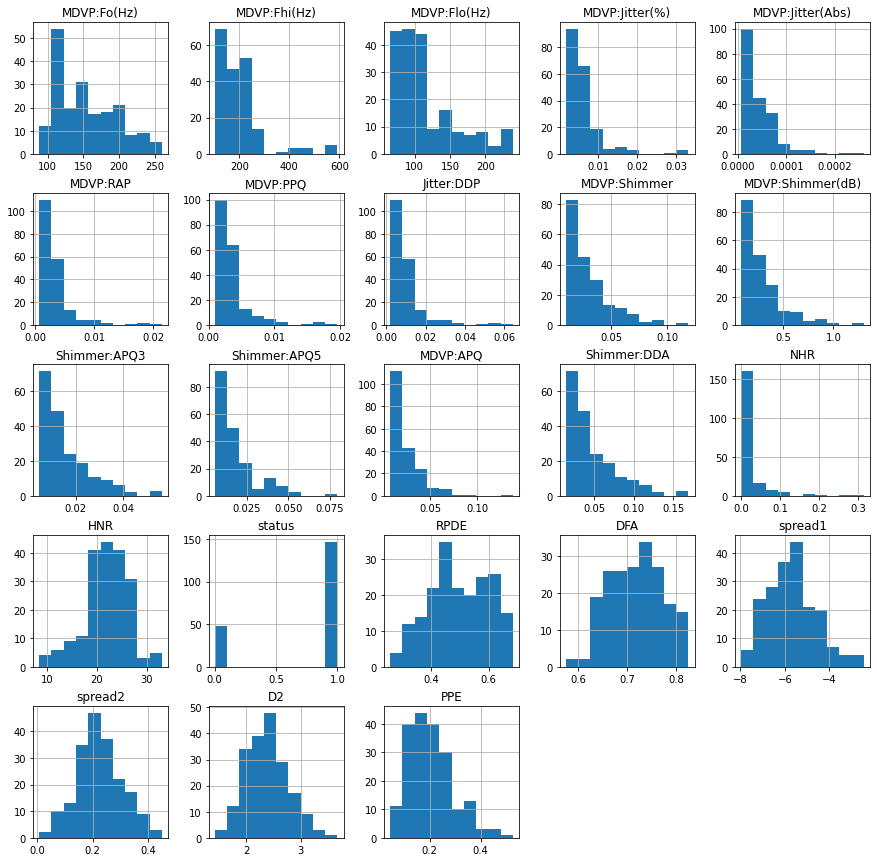

In [7]:
df.hist(figsize=(15,15));

In [8]:
df = df.drop('name', axis = 1)

# HeatMap

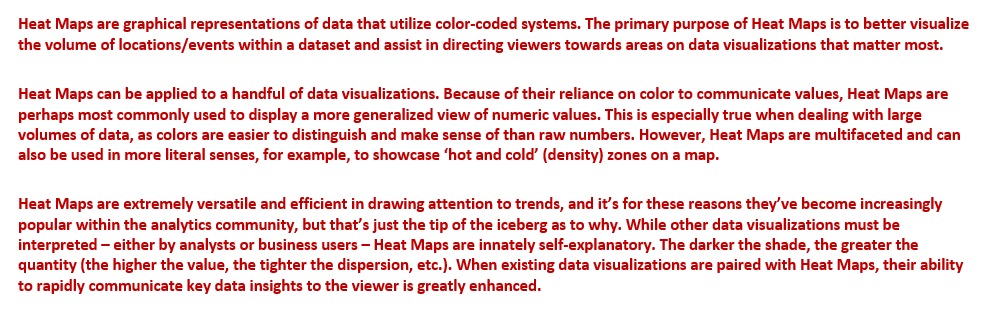

<AxesSubplot:>

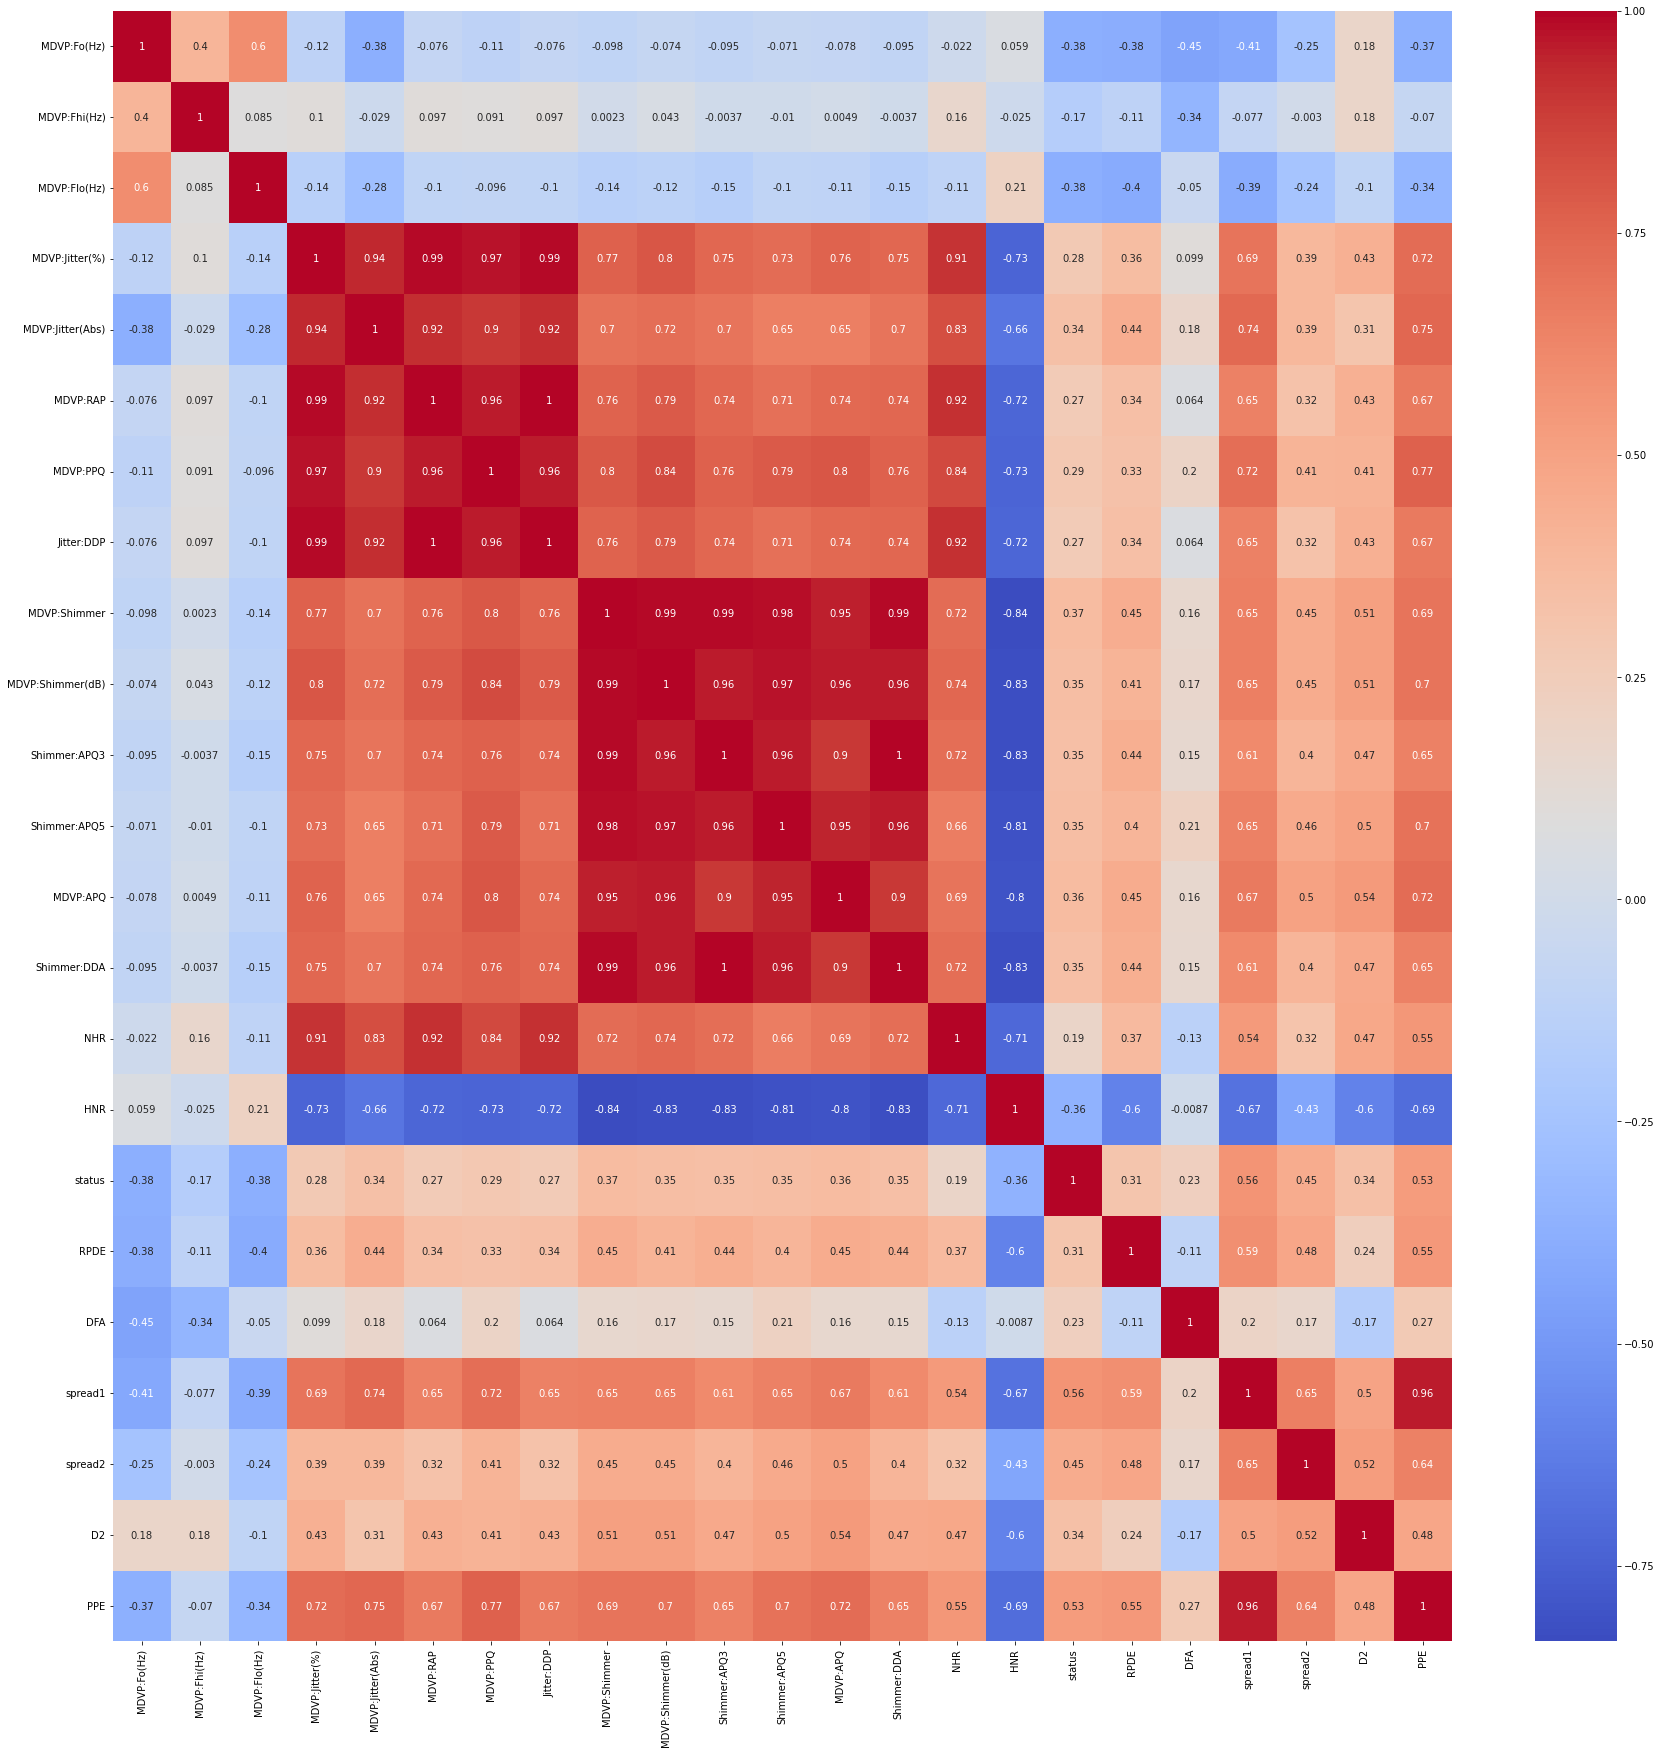

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot = True, cmap= "coolwarm")

## Data Splitting and Feature Scaling

**Feature scaling is an important step during data pre-processing to standardize the independent features present in the dataset. By standardizing, we mean to scale the features to bring them in the same range. 
 It changes the numeric values
of columns without losing any information. It is required so as to re-scale the values of a particular feature in a specific
range.**

**Standardization makes the values of each feature center around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.**

In [10]:
x = df.drop('status', axis = 1)
y = df['status']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=101)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
sc = StandardScaler()

sc.fit(x_train)
sc.fit(x_test)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)


## Principal Component Analysis

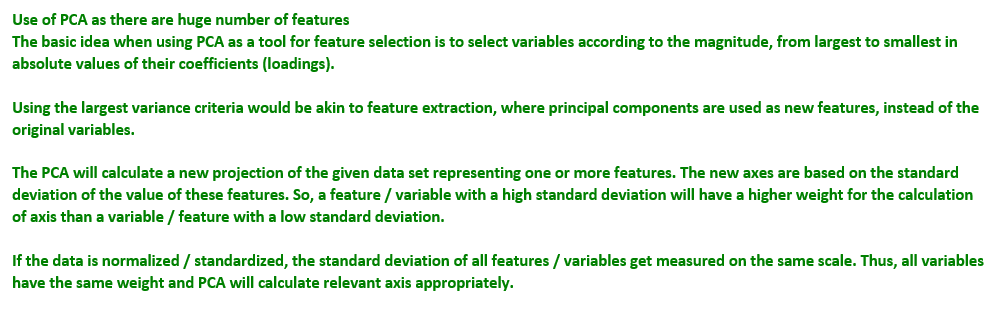

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(x_train_std)

x_train_pca = pca.transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

## Perceptron Learning

**The perceptron model detects whether any function is an input or not and classifies them in either of the classes. he perceptron conducts binary classification or two-class categorization and enables neurons to learn and register information procured from the inputs.** 

**The working of the model is based on the Perceptron Learning Rule that implies that the algorithm is enabled to automatically learn respective coefficients of weights that designate several inputs.** 

In [13]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.01)
ppn.fit(x_train_std , y_train)

pred_train = ppn.predict(x_train_std)
pred_test = ppn.predict(x_test_std)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(pred_train,y_train)
print("Training Accuracy: ",train_acc*100,"%")
train_acc = accuracy_score(pred_test,y_test)
print("Testing Accuracy: ",train_acc*100,"%")

Training Accuracy:  84.93150684931507 %
Testing Accuracy:  87.75510204081633 %


## Decision Tree Classifier


**The model is constructed from a high level, decision tree induction goes through 4 main steps to build the tree:**

**(a) begin with training dataset, which should have some feature variables and classification or regression output,** <br>
**(b) determine the “best feature” in the dataset to split the data in order to define “best feature” later,** <br>
**(c) split the data into subsets that contain the possible values for this best feature. This splitting basically defines a node on the tree i.e each node is a splitting point based on a certain feature from the data.** <br>
**(d) recursively generate new tree nodes by using the subset of data created . The sstep keep splitting until reach a point where it reach the optimimum, by some measure, maximum accuracy while minimising the number of splits / nodes.**

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train_std , y_train)

pred_train = tree.predict(x_train_std)
pred_test = tree.predict(x_test_std)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(pred_train,y_train)
print("Training Accuracy: ",train_acc*100,"%")
train_acc = accuracy_score(pred_test,y_test)
print("Testing Accuracy: ",train_acc*100,"%")

Training Accuracy:  95.2054794520548 %
Testing Accuracy:  89.79591836734694 %


## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

r = RandomForestClassifier(n_estimators=100 , max_depth = 5)

r.fit(x_train_std , y_train)

pred_train = r.predict(x_train_std)
pred_test = r.predict(x_test_std)


from sklearn.metrics import accuracy_score

train_acc = accuracy_score(pred_train,y_train)
print("Training Accuracy: ",train_acc*100,"%")
train_acc = accuracy_score(pred_test,y_test)
print("Testing Accuracy: ",train_acc*100,"%")

Training Accuracy:  99.31506849315068 %
Testing Accuracy:  95.91836734693877 %


## K Neighbors Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train_std , y_train)

pred_train = knn.predict(x_train_std)
pred_test = knn.predict(x_test_std)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(pred_train,y_train)
print("Training Accuracy: ",train_acc*100,"%")
train_acc = accuracy_score(pred_test,y_test)
print("Testing Accuracy: ",train_acc*100,"%")

Training Accuracy:  82.87671232876713 %
Testing Accuracy:  89.79591836734694 %


## Support Vector Classifier

In [17]:
from sklearn.svm import SVC

sv = SVC(C=1 , kernel='linear')
sv.fit(x_train_std , y_train)

pred_train = sv.predict(x_train_std)
pred_test = sv.predict(x_test_std)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(pred_train,y_train)
print("Training Accuracy: ",train_acc*100,"%")
test_acc = accuracy_score(pred_test,y_test)
print("Testing Accuracy: ",test_acc*100,"%")

Training Accuracy:  89.04109589041096 %
Testing Accuracy:  93.87755102040816 %


## Performance Report

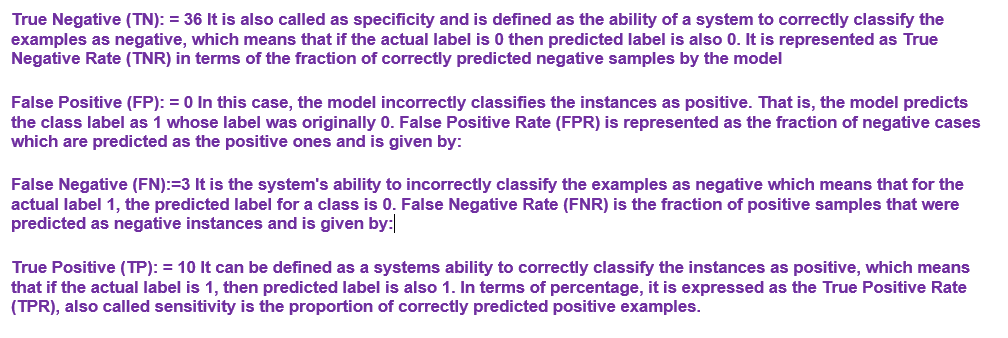

In [18]:
from sklearn.metrics import classification_report

cr = classification_report(y_test , pred_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.92      1.00      0.96        36

    accuracy                           0.94        49
   macro avg       0.96      0.88      0.91        49
weighted avg       0.94      0.94      0.94        49



[[10  3]
 [ 0 36]]


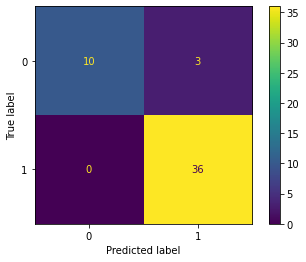

In [19]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

cm = confusion_matrix(y_test , pred_test)

print(cm)

plot_confusion_matrix(sv , x_test_std , y_test)



## Among all the classifiers, it was found that the Random Forest outperforms the other classifiers in machine learning algorithms, reporting an accuracy of 99.31%  

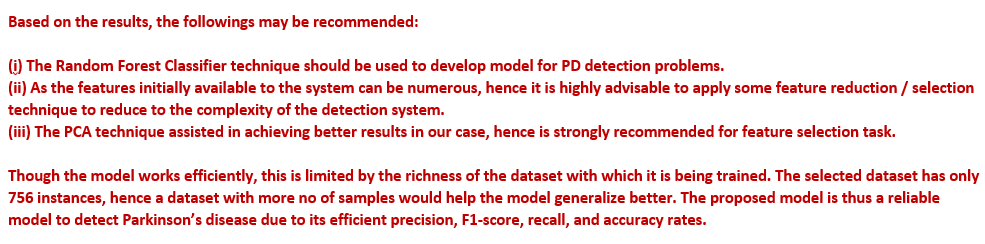



# Key Insights and Conclusion

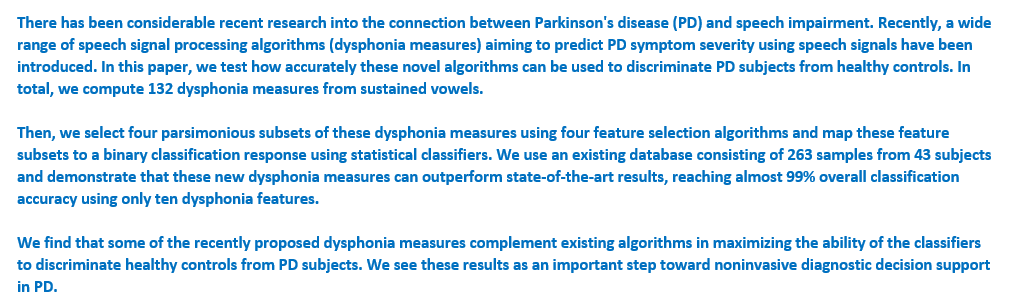



